<h1 style="text-align: center; font-size: 40px;">Housing Price Prediction</h1>



This is a project I have completed independently at CUNY Baruch College during 2025 spring semester when taking STA 9890 Statistical Machine Learning under the supervision of Professor Michael Weylandt.

The objective of this project is to predict the 2019 property tax payment of an unknown city in the United States with 100,000 units.


Many models are used and compared at the end with the goal to better select a suitable model under different circumstances.

The conclusion is that statistical approach generally outperforms data-only method, yet manipulation of data with domain knowledge mostly has the best performance.

Raw data will be provided upon request.

Load Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Load Data

In [2]:

# Load data
training_data = pd.read_csv("assessment_history_train.csv", na_values=["NA", ""])
test_data = pd.read_csv("assessment_history_test.csv", na_values=["NA", ""])
building_2019 = pd.read_csv("building_details_2019.csv", na_values=["NA", ""])
building_2018 = pd.read_csv("building_details_2018.csv", na_values=["NA", ""])
building_2017 = pd.read_csv("building_details_2017.csv", na_values=["NA", ""])
building_2016 = pd.read_csv("building_details_2016.csv", na_values=["NA", ""])
building_2015 = pd.read_csv("building_details_2015.csv", na_values=["NA", ""])
solution=pd.read_csv("solution.csv", na_values=["NA", ""])

C:\Users\etroi\AppData\Local\Temp\ipykernel_30052\3727623394.py:3: DtypeWarning: Columns (21,23,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv("assessment_history_test.csv", na_values=["NA", ""])
C:\Users\etroi\AppData\Local\Temp\ipykernel_30052\3727623394.py:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  building_2015 = pd.read_csv("building_details_2015.csv", na_values=["NA", ""])


In [3]:
training_data.shape

(628287, 37)

Check whether any NA values exist in the dataframes.

In [4]:
print("training_data:", training_data.isna().any().any())
print("test_data:", test_data.isna().any().any())
print("building_2019:", building_2019.isna().any().any())
print("building_2018:", building_2018.isna().any().any())
print("building_2017:", building_2017.isna().any().any())
print("building_2016:", building_2016.isna().any().any())
print("building_2015:", building_2015.isna().any().any())
print("solution:", solution.isna().any().any())


training_data: True
test_data: True
building_2019: True
building_2018: True
building_2017: True
building_2016: True
building_2015: True
solution: False


There are more missing values in the dataframes that are further away from the year 2019.

In [5]:
print("training_data missing values:\n", training_data.isna().sum())


training_data missing values:
 acct                       0
building_area_2015     37409
land_area_2015         37409
building_area_2016     28603
land_area_2016         28603
building_area_2017     19458
land_area_2017         19458
building_area_2018     10248
land_area_2018         10248
region                     0
building_area_2019         0
land_area_2019             0
building_value_2015    37409
land_value_2015        37409
building_value_2016    28603
land_value_2016        28603
building_value_2017    19458
land_value_2017        19458
building_value_2018    10248
land_value_2018        10248
building_value_2019        0
land_value_2019            0
assessed_2015          37409
protested_2015         37409
assessed_2016          28603
protested_2016         28603
assessed_2017          19458
protested_2017         19458
assessed_2018          10248
protested_2018         10248
assessed_2019              0
protested_2019             0
school_dist                3
zone        

I drop all rows with any NA cell instead of fill them with mean value because fewer row (38k drop from 600k) doesn't reduce the accuracy as much as guessing the NA values.

In [6]:
# Drop rows with any NA in the specified DataFrames
training_data = training_data.dropna()
building_2019 = building_2019.dropna()
building_2018 = building_2018.dropna()
building_2017 = building_2017.dropna()
building_2016 = building_2016.dropna()
building_2015 = building_2015.dropna()


Now only test_data has NA cell, I will deal with that after getting the prediction model.

In [7]:
print("training_data:", training_data.isna().any().any())
print("test_data:", test_data.isna().any().any())
print("building_2019:", building_2019.isna().any().any())
print("building_2018:", building_2018.isna().any().any())
print("building_2017:", building_2017.isna().any().any())
print("building_2016:", building_2016.isna().any().any())
print("building_2015:", building_2015.isna().any().any())
print("solution:", solution.isna().any().any())

training_data: False
test_data: True
building_2019: False
building_2018: False
building_2017: False
building_2016: False
building_2015: False
solution: False


In [8]:
print("training_data missing values:\n", training_data.isna().sum())

training_data missing values:
 acct                   0
building_area_2015     0
land_area_2015         0
building_area_2016     0
land_area_2016         0
building_area_2017     0
land_area_2017         0
building_area_2018     0
land_area_2018         0
region                 0
building_area_2019     0
land_area_2019         0
building_value_2015    0
land_value_2015        0
building_value_2016    0
land_value_2016        0
building_value_2017    0
land_value_2017        0
building_value_2018    0
land_value_2018        0
building_value_2019    0
land_value_2019        0
assessed_2015          0
protested_2015         0
assessed_2016          0
protested_2016         0
assessed_2017          0
protested_2017         0
assessed_2018          0
protested_2018         0
assessed_2019          0
protested_2019         0
school_dist            0
zone                   0
subneighborhood        0
neighborhood           0
TARGET                 0
dtype: int64


In [9]:
training_data.shape

(589957, 37)

In [10]:
test_data.shape

(418858, 33)

In [11]:
training_data.head()

,acct,building_area_2015,land_area_2015,building_area_2016,land_area_2016,building_area_2017,land_area_2017,building_area_2018,land_area_2018,region,...,protested_2017,assessed_2018,protested_2018,assessed_2019,protested_2019,school_dist,zone,subneighborhood,neighborhood,TARGET
0,cb6434705a05b139cb63994aa2a194b226b9e750,1853.0,4263.0,1853.0,4263.0,1853.0,4263.0,1853.0,4263.0,05946c0909f5c241db6179659dc763e14544cf75,...,True,122500.0,True,145000,True,8.0,1b2fc12a8ee5147b030dae24f76bfb63bf401fdd,9bd56df07606b41647719f2022859ef0571cf82c,78bde8025e65c00938c9f5a63f652c33c7b7fc61,145000
1,965bbe53f6f63e4853b5a30ba28cf016d489de80,1282.0,6780.0,1282.0,6780.0,1282.0,6780.0,1282.0,6780.0,7fb552ebc782591a0e4a0b770897f05ddc782d7d,...,False,92171.0,False,87291,False,9.0,34827051b895693d5256b50bbfd93d1edfcc9e57,25f65e19a463ff57232c7dfcde28e5da1e1daf2e,5495e69e361f526f9e9cd261fa962d6855a25e1d,87291
2,c68f351c68aa385ec1e8c866e5f8f27486894ca1,1705.0,11400.0,1705.0,11400.0,1705.0,11400.0,1705.0,11400.0,6bbed0508643ceb1fc53fd0d87d5bd5692e63f59,...,False,93038.0,False,93038,False,1.0,08900a31f38af1b7cc90edbf7fe0a51b223b7cea,b7a148094f9e45c93317ecd470468158badfdd67,95b716d0ecd06b5817ac70061b3891e9b2b1b9df,93038
3,dcd1fedd707398670790d4e2dc2f3959755644bc,1525.0,6050.0,1525.0,6050.0,1525.0,6050.0,1525.0,6050.0,05946c0909f5c241db6179659dc763e14544cf75,...,False,154463.0,True,153325,True,8.0,80d118e9664f13333ec56471233757aae3670248,3e4238a9dede4db257f8db619ba3ae59dae8c22b,2cf01a6f31e9209edc33e04502c3ac792ccfe483,153325
4,e6945b0343e266eb516cbd035093aa8f111cf21f,2873.0,12371.0,2873.0,12371.0,2873.0,12371.0,2873.0,12371.0,8313aed7a2170658379a4543432d30a7a4c9c0f9,...,False,167732.0,False,192413,False,24.0,01607e23a50f715d7b6156391072890485810e80,2230753ca14dfdaf45cadf8b44b39d64868395f2,dec42cf689b88bc6c3376b744ba1eef6241bb72e,192413


In [12]:
test_data.head()

,acct,building_area_2015,land_area_2015,building_area_2016,land_area_2016,building_area_2017,land_area_2017,building_area_2018,land_area_2018,region,...,protested_2016,assessed_2017,protested_2017,assessed_2018,protested_2018,protested_2019,school_dist,zone,subneighborhood,neighborhood
0,bb75f25168addc1117840b10c0fd6cd0c2a7b7c6,2537.0,5000.0,2537.0,5000.0,2537.0,5000.0,2537.0,5000.0,02a37f2eadcf42e9ab0748a5814e8d2f43319ecd,...,False,360475.0,False,360475.0,False,False,1,ea08b1b7cad521f20b71379bcef05c2741eaeee8,6f23373854222ed999c4c2114f5cb4929f22773e,6315b211033894c97f758c5b2d0e53a00ca66f81
1,8def0ccceda200b673872a8a9367644767989f3b,1496.0,5000.0,1496.0,5000.0,1496.0,5000.0,1496.0,5000.0,02a37f2eadcf42e9ab0748a5814e8d2f43319ecd,...,False,128297.0,False,128297.0,False,False,1,ea08b1b7cad521f20b71379bcef05c2741eaeee8,6f23373854222ed999c4c2114f5cb4929f22773e,6315b211033894c97f758c5b2d0e53a00ca66f81
2,ca33e57b3b13e843909f4b6cbd9a3410387bd45a,1508.0,6250.0,1508.0,6250.0,1508.0,6250.0,1508.0,6250.0,02a37f2eadcf42e9ab0748a5814e8d2f43319ecd,...,False,254430.0,True,254430.0,True,False,1,ea08b1b7cad521f20b71379bcef05c2741eaeee8,6f23373854222ed999c4c2114f5cb4929f22773e,6315b211033894c97f758c5b2d0e53a00ca66f81
3,3e0f6f6090a8226ce67ccf2f8630b8ad630b8d55,1670.0,6250.0,1670.0,6250.0,1670.0,6250.0,1670.0,6250.0,02a37f2eadcf42e9ab0748a5814e8d2f43319ecd,...,False,144778.0,False,144778.0,False,False,1,ea08b1b7cad521f20b71379bcef05c2741eaeee8,6f23373854222ed999c4c2114f5cb4929f22773e,6315b211033894c97f758c5b2d0e53a00ca66f81
4,63facf82adbae10b23f7fabc93188c95bd832f51,1944.0,1765.0,1944.0,1765.0,1944.0,1765.0,1944.0,1765.0,02a37f2eadcf42e9ab0748a5814e8d2f43319ecd,...,True,299000.0,True,299000.0,True,True,1,dbc07ca46df4d92a2f442e606b88f713a3ce17b0,a05e04bd0670926829bb3a522eb622388c476059,afacbde0e748405899759d1b1abda5d9fce45151


In [13]:
solution.head()

,ACCOUNT,TARGET
0,bb75f25168addc1117840b10c0fd6cd0c2a7b7c6,360475
1,8def0ccceda200b673872a8a9367644767989f3b,128297
2,ca33e57b3b13e843909f4b6cbd9a3410387bd45a,254430
3,3e0f6f6090a8226ce67ccf2f8630b8ad630b8d55,144778
4,63facf82adbae10b23f7fabc93188c95bd832f51,299000


The training_data, test_data, and the building data by year all have different keys from the solution, so I change all"acct" columns to "ACCOUNT".

In [14]:
# Rename 'acct' to 'ACCOUNT' in both training_data and test_data
training_data.rename(columns={'acct': 'ACCOUNT'}, inplace=True)
test_data.rename(columns={'acct': 'ACCOUNT'}, inplace=True)
building_2015.rename(columns={'acct': 'ACCOUNT'}, inplace=True)
building_2016.rename(columns={'acct': 'ACCOUNT'}, inplace=True)
building_2017.rename(columns={'acct': 'ACCOUNT'}, inplace=True)
building_2018.rename(columns={'acct': 'ACCOUNT'}, inplace=True)
building_2019.rename(columns={'acct': 'ACCOUNT'}, inplace=True)

# Check if the renaming was successful
print(training_data.columns)
print(test_data.columns)


Index(['ACCOUNT', 'building_area_2015', 'land_area_2015', 'building_area_2016',
       'land_area_2016', 'building_area_2017', 'land_area_2017',
       'building_area_2018', 'land_area_2018', 'region', 'building_area_2019',
       'land_area_2019', 'building_value_2015', 'land_value_2015',
       'building_value_2016', 'land_value_2016', 'building_value_2017',
       'land_value_2017', 'building_value_2018', 'land_value_2018',
       'building_value_2019', 'land_value_2019', 'assessed_2015',
       'protested_2015', 'assessed_2016', 'protested_2016', 'assessed_2017',
       'protested_2017', 'assessed_2018', 'protested_2018', 'assessed_2019',
       'protested_2019', 'school_dist', 'zone', 'subneighborhood',
       'neighborhood', 'TARGET'],
      dtype='object')
Index(['ACCOUNT', 'building_area_2015', 'land_area_2015', 'building_area_2016',
       'land_area_2016', 'building_area_2017', 'land_area_2017',
       'building_area_2018', 'land_area_2018', 'region', 'building_area_2019',
  

In [15]:
# Get the column names for both datasets
training_columns = set(training_data.columns)
test_columns = set(test_data.columns)

# Find columns present in one dataset but not the other
columns_in_training_not_in_test = training_columns - test_columns
columns_in_test_not_in_training = test_columns - training_columns

# Print out the differences
print("Columns in training_data but not in test_data:", columns_in_training_not_in_test)
print("Columns in test_data but not in training_data:", columns_in_test_not_in_training)


Columns in training_data but not in test_data: {'building_value_2019', 'TARGET', 'land_value_2019', 'assessed_2019'}
Columns in test_data but not in training_data: set()


3 columns from the test_data are removed before posted, so I have to dorp the 3 columns from the training_data as well.

In [16]:
# Drop the columns that are in training_data but not in test_data
columns_to_drop =  ["land_value_2019", "assessed_2019", "building_value_2019"]
training_data = training_data.drop(columns=columns_to_drop)

# Verify the new shape of the training_data
print(training_data.shape)



(589957, 34)


In [17]:
training_data.shape

(589957, 34)

In [18]:
training_data.dtypes

ACCOUNT                 object
building_area_2015     float64
land_area_2015         float64
building_area_2016     float64
land_area_2016         float64
building_area_2017     float64
land_area_2017         float64
building_area_2018     float64
land_area_2018         float64
region                  object
building_area_2019       int64
land_area_2019           int64
building_value_2015    float64
land_value_2015        float64
building_value_2016    float64
land_value_2016        float64
building_value_2017    float64
land_value_2017        float64
building_value_2018    float64
land_value_2018        float64
assessed_2015          float64
protested_2015          object
assessed_2016          float64
protested_2016          object
assessed_2017          float64
protested_2017          object
assessed_2018          float64
protested_2018          object
protested_2019            bool
school_dist            float64
zone                    object
subneighborhood         object
neighbor

In [19]:
test_data.dtypes

ACCOUNT                 object
building_area_2015     float64
land_area_2015         float64
building_area_2016     float64
land_area_2016         float64
building_area_2017     float64
land_area_2017         float64
building_area_2018     float64
land_area_2018         float64
region                  object
building_area_2019       int64
land_area_2019           int64
building_value_2015    float64
land_value_2015        float64
building_value_2016    float64
land_value_2016        float64
building_value_2017    float64
land_value_2017        float64
building_value_2018    float64
land_value_2018        float64
assessed_2015          float64
protested_2015          object
assessed_2016          float64
protested_2016          object
assessed_2017          float64
protested_2017          object
assessed_2018          float64
protested_2018          object
protested_2019            bool
school_dist              int64
zone                    object
subneighborhood         object
neighbor

Distribution of Target or Value Columns

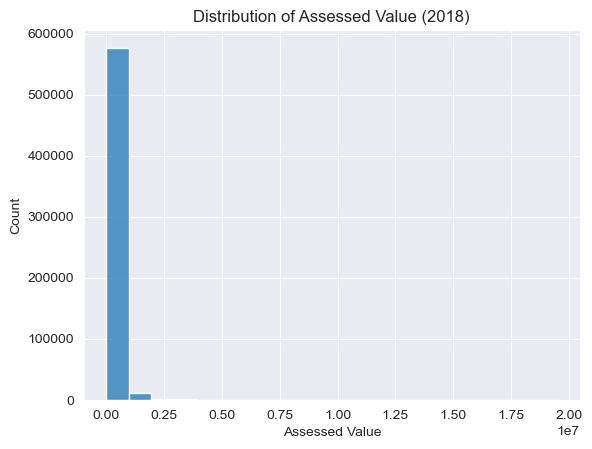

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(training_data['assessed_2018'], bins=20)
plt.title("Distribution of Assessed Value (2018)")
plt.xlabel("Assessed Value")
plt.ylabel("Count")
plt.show()


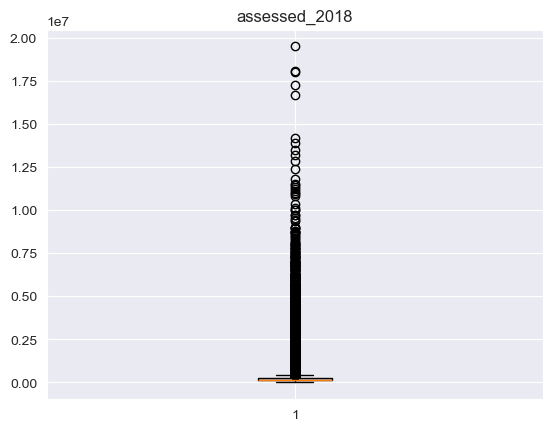

In [21]:
import matplotlib.pyplot as plt

# Example for one numeric column
plt.boxplot(training_data['assessed_2018'].dropna())
plt.title('assessed_2018')
plt.show()


Filter Out Extreme Outliers (Zoom In)

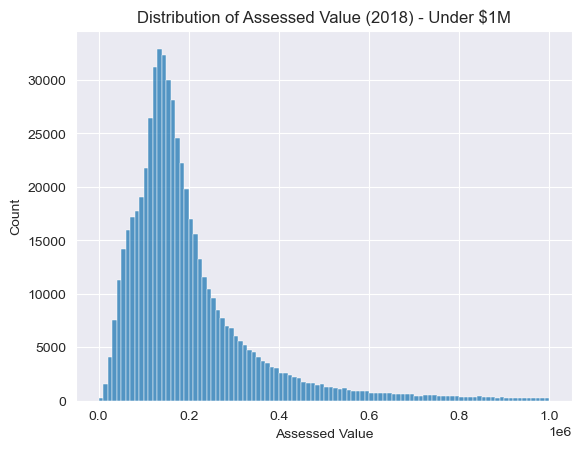

In [22]:
# Filter out extreme high-end values
subset = training_data[training_data['assessed_2018'] < 1_000_000]

sns.histplot(subset['assessed_2018'], bins=100)
plt.title("Distribution of Assessed Value (2018) - Under $1M")
plt.xlabel("Assessed Value")
plt.ylabel("Count")
plt.show()


Correlation Heatmap (Numerical Features Only)

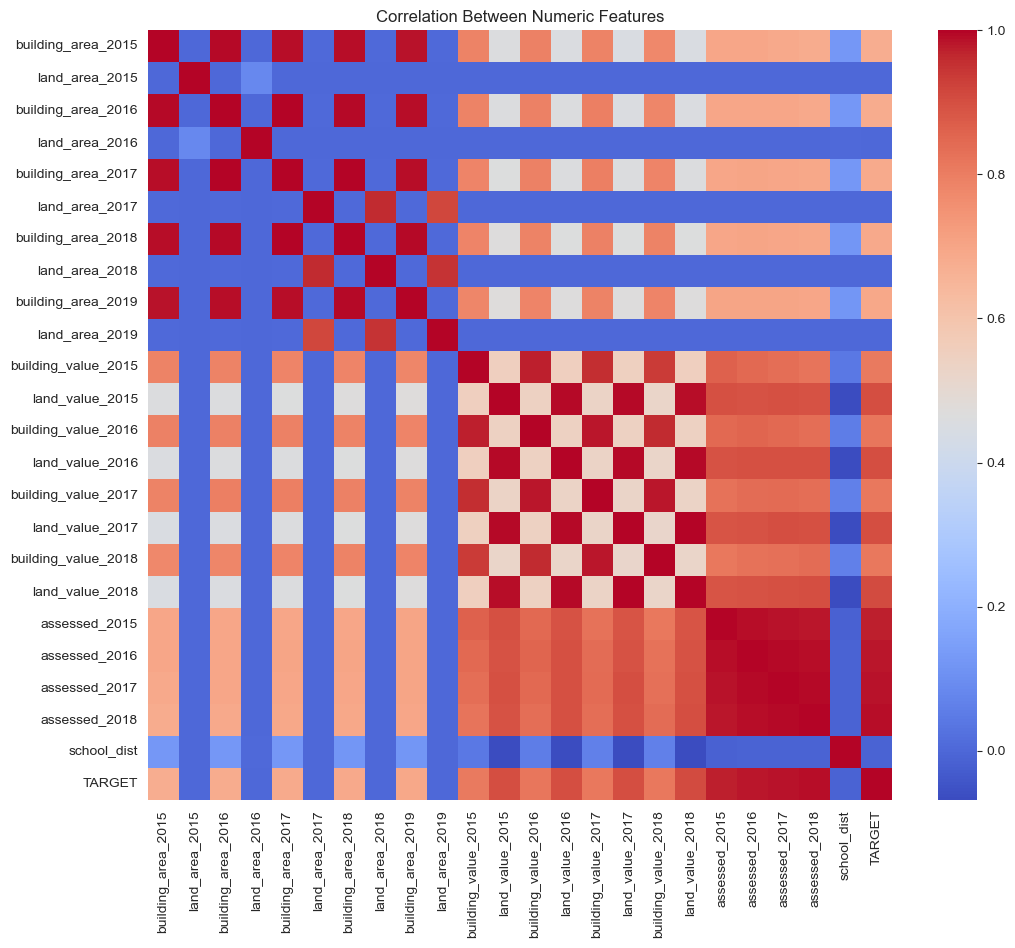

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = training_data.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols, cmap='coolwarm', annot=False)
plt.title("Correlation Between Numeric Features")
plt.show()


Boxplots for Categorical vs Numeric

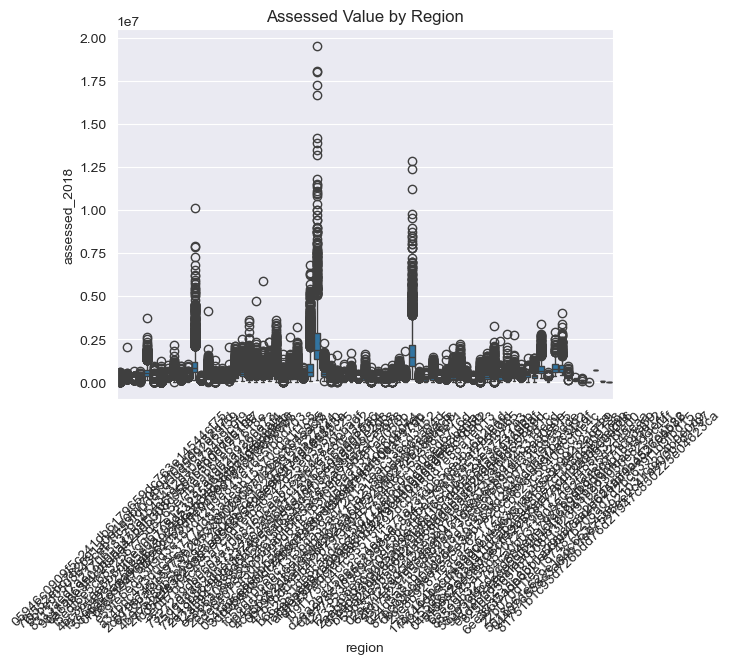

In [24]:
sns.boxplot(x='region', y='assessed_2018', data=training_data)
plt.title("Assessed Value by Region")
plt.xticks(rotation=45)
plt.show()


Apply a Log Scale to the Y-axis. We then see that there are extreme values either vary high or low in term of assessment values.

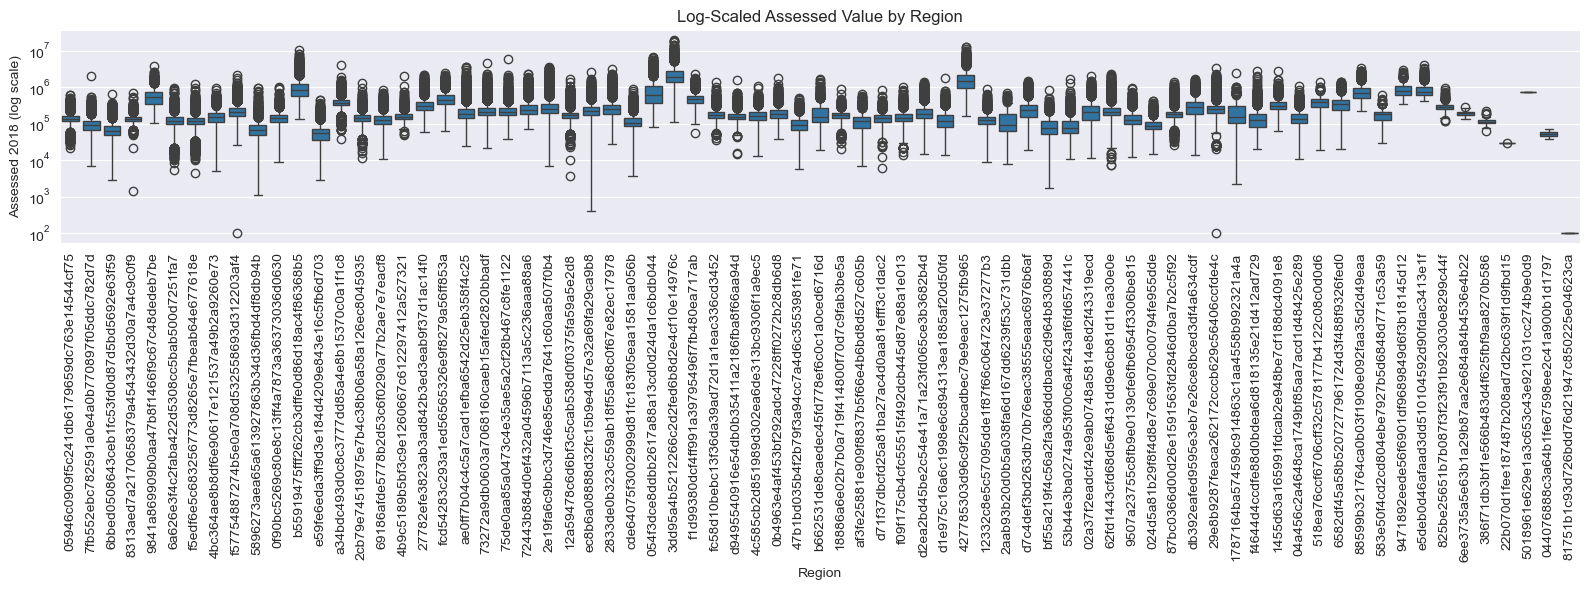

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 6))  # Wider figure for many regions
sns.boxplot(x='region', y='assessed_2018', data=training_data)
plt.yscale('log')  # <- Log scale
plt.title("Log-Scaled Assessed Value by Region")
plt.xlabel("Region")
plt.ylabel("Assessed 2018 (log scale)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Bar Plot of Protest Rates

Text(0.5, 1.0, 'Protest Frequency (2018)')

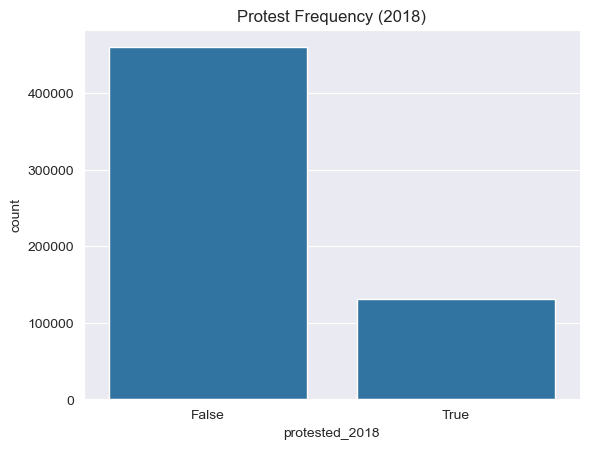

In [26]:
sns.countplot(data=training_data, x='protested_2018')
plt.title("Protest Frequency (2018)")

Rename and join building data

In [27]:

# Rename and join building data
building_2019_renamed = building_2019.rename(columns=lambda x: f"{x}_2019" if x != "ACCOUNT" else x)
building_2018_renamed = building_2018.rename(columns=lambda x: f"{x}_2018" if x != "ACCOUNT" else x)

training_data = training_data.merge(building_2019_renamed, on="ACCOUNT", how="left") \
                            .merge(building_2018_renamed, on="ACCOUNT", how="left")

test_data = test_data.merge(building_2019_renamed, on="ACCOUNT", how="left") \
                    .merge(building_2018_renamed, on="ACCOUNT", how="left")

Feature engineering

In [28]:

# Feature engineering
training_data['year_remodeled_2019'] = np.where(training_data['year_remodeled_2019'] == 2019, 1, 0)
training_data['density_2019'] = training_data['building_area_2019'] / training_data['land_area_2019']

test_data['year_remodeled_2019'] = np.where(test_data['year_remodeled_2019'] == 2019, 1, 0)
test_data['density_2019'] = test_data['building_area_2019'] / test_data['land_area_2019']

In [29]:
training_data.info

<bound method DataFrame.info of                                          ACCOUNT  building_area_2015  \
0       cb6434705a05b139cb63994aa2a194b226b9e750              1853.0   
1       965bbe53f6f63e4853b5a30ba28cf016d489de80              1282.0   
2       c68f351c68aa385ec1e8c866e5f8f27486894ca1              1705.0   
3       dcd1fedd707398670790d4e2dc2f3959755644bc              1525.0   
4       e6945b0343e266eb516cbd035093aa8f111cf21f              2873.0   
...                                          ...                 ...   
589952  096ae9cd01609cb0893f2ef91dc757824e4e84f2              1244.0   
589953  0b477a421bd606cc68cd53bc094e074870bdb335              3258.0   
589954  c09bb8493d33797362fd894c49cf7d4e02509a8a              1019.0   
589955  2e4ed275ab26ed4aefc2e80bc1db5b5cb7cae88a              1587.0   
589956  5eccd04f798d31921aa33d411b838a99148619d0              1124.0   

        land_area_2015  building_area_2016  land_area_2016  \
0               4263.0              1853.

In [30]:
training_data.dtypes

ACCOUNT                     object
building_area_2015         float64
land_area_2015             float64
building_area_2016         float64
land_area_2016             float64
                            ...   
has_heat_2018               object
physical_condition_2018     object
exterior_walls_2018         object
year_2018                  float64
density_2019               float64
Length: 87, dtype: object

In [31]:
features = training_data.columns.difference(['TARGET', 'ACCOUNT']).tolist()

In [32]:
from sklearn.model_selection import train_test_split

# Step 1: Define features and target
features = training_data.columns.difference(['TARGET', 'acct', 'ACCOUNT']).tolist()
X = training_data[features]
y = training_data['TARGET']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Encode categorical columns (objects → codes)
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category').cat.codes
        X_test[col] = X_test[col].astype('category').cat.codes


In [33]:
for col in features:
    if X_train[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category').cat.codes
        X_test[col] = X_test[col].astype('category').cat.codes


In [34]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [35]:
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols.tolist())


Non-numeric columns: ['protested_2019']


In [36]:
training_data["protested_2019"]

0          True
1         False
2         False
3          True
4         False
          ...  
589952    False
589953    False
589954    False
589955    False
589956    False
Name: protested_2019, Length: 589957, dtype: bool

In [37]:
training_data['protested_2019'] = training_data['protested_2019'].astype(int)
test_data['protested_2019'] = test_data['protested_2019'].astype(int)


In [38]:
print(training_data['protested_2019'].unique())
print(test_data['protested_2019'].unique())
# Output: [1 0]


[1 0]
[0 1]


In [39]:
from sklearn.model_selection import train_test_split

X = training_data[features]
y = training_data['TARGET']



In [40]:
# Only apply to numeric columns
numeric_X_train = X_train.select_dtypes(include=[np.number])

print(np.isinf(numeric_X_train).any().any())   # Check for inf
print(np.isnan(numeric_X_train).any().any())   # Check for NaN


True
False


In [41]:
import numpy as np

# Step 1: Replace inf and -inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Replace NaN with column mean (or 0 if you prefer)
X_train.fillna(X_train.mean(numeric_only=True), inplace=True)


In [42]:
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols.tolist())


['protested_2019']


In [43]:
for col in non_numeric_cols:
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col] = X_test[col].astype('category').cat.codes


In [44]:
import numpy as np

# Replace inf/-inf with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN with column means (or 0, if you prefer)
X_train.fillna(X_train.mean(), inplace=True)


Some important features from the test data are removed, so assessed_19 and land_value_19 are ignored accordingly

                feature  importance
3         assessed_2018    0.837597
2         assessed_2017    0.142463
1         assessed_2016    0.002733
81      year_built_2019    0.001835
0         assessed_2015    0.001294
56      land_value_2018    0.000828
55      land_value_2017    0.000709
53      land_value_2015    0.000587
75      subneighborhood    0.000518
59         neighborhood    0.000438
54      land_value_2016    0.000431
13  building_value_2015    0.000418
16  building_value_2018    0.000411
10   building_area_2019    0.000390
14  building_value_2016    0.000390


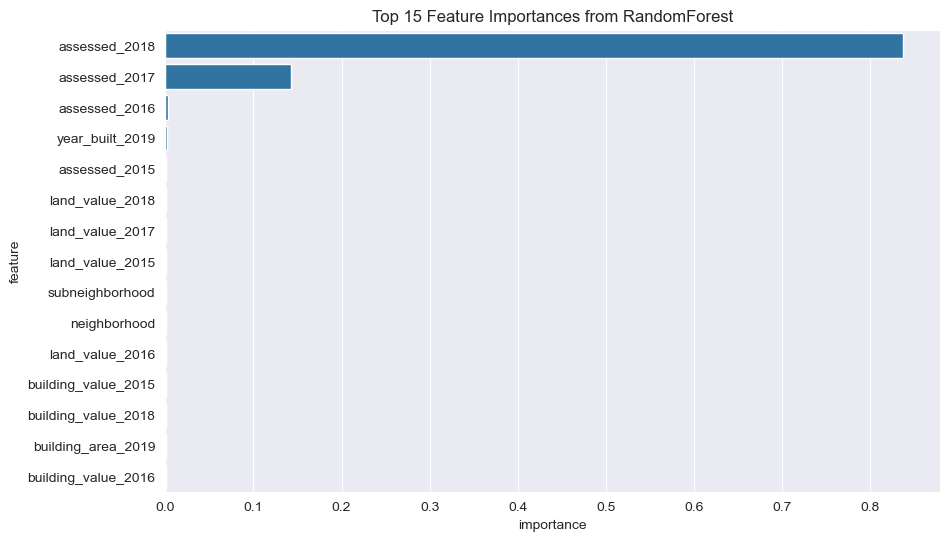

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train model if not already trained
from sklearn.ensemble import RandomForestRegressor

final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame({
    'feature': features,  # Make sure `features` is a list of column names
    'importance': final_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Print top 10
print(importances.head(15))

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(data=importances.head(15), x='importance', y='feature')
plt.title("Top 15 Feature Importances from RandomForest")
plt.show()



Convert categorical columns

In [46]:

# Convert categorical columns
factor_cols = ["assessed_2018", "assessed_2017", "assessed_2016", "year_built_2019", "assessed_2015", "land_value_2018", "land_value_2017", "land_value_2015", "subneighborhood", "neighborhood","land_value_2016", "building_value_2015", "building_value_2018", "building_area_2019", "building_value_2016"]

# Step 1: Identify categorical columns, excluding 'acct'
factor_cols = training_data.select_dtypes(include=['object', 'category']).columns
factor_cols = [col for col in factor_cols if col != 'ACCOUNT']  # exclude 'acct'

# Step 2: Convert to category and encode using .cat.codes
for col in factor_cols:
    combined = pd.concat([training_data[col], test_data[col]], axis=0).astype('category')
    training_data[col] = pd.Categorical(training_data[col], categories=combined.cat.categories).codes
    test_data[col] = pd.Categorical(test_data[col], categories=combined.cat.categories).codes



Split 80/20

In [47]:

# Split 80/20
train_split, valid_split = train_test_split(training_data, test_size=0.2, random_state=123)

In [48]:

# Define features and target
features = ["assessed_2018", "assessed_2017", "assessed_2016", "year_built_2019", "assessed_2015", "land_value_2018", "land_value_2017", "land_value_2015", "subneighborhood", "neighborhood","land_value_2016", "building_value_2015", "building_value_2018", "building_area_2019", "building_value_2016"]

target = 'TARGET'

In [49]:
print(train_split[features].dtypes)  # Check feature column data types
print(train_split[target].dtypes)  # Check target column data type


assessed_2018          float64
assessed_2017          float64
assessed_2016          float64
year_built_2019        float64
assessed_2015          float64
land_value_2018        float64
land_value_2017        float64
land_value_2015        float64
subneighborhood          int16
neighborhood             int16
land_value_2016        float64
building_value_2015    float64
building_value_2018    float64
building_area_2019       int64
building_value_2016    float64
dtype: object
int64


Train model on training split

In [50]:

# Train model on training split
model_split = RandomForestRegressor(n_estimators=100, random_state=123)
model_split.fit(train_split[features], train_split[target])

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:

# Predict on validation set
val_preds = model_split.predict(valid_split[features])
val_rmse = np.sqrt(mean_squared_error(valid_split[target], val_preds))
val_r2 = r2_score(valid_split[target], val_preds)

print(f"Validation RMSE: {val_rmse}")
print(f"Validation R²: {val_r2}")

Validation RMSE: 38268.07312385923
Validation R²: 0.9863245964430121


Train final model on full training data

In [52]:

# Train final model on full training data
final_model = RandomForestRegressor(n_estimators=100, random_state=123)
final_model.fit(training_data[features], training_data[target])

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Predict on test set

In [53]:

# Predict on test set
test_data['TARGET_pred'] = final_model.predict(test_data[features])

In [54]:

# Feature importance
importances = pd.DataFrame({
    'feature': features,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)
print(importances)

                feature  importance
0         assessed_2018    0.841579
1         assessed_2017    0.139891
3       year_built_2019    0.002959
2         assessed_2016    0.002877
4         assessed_2015    0.002705
13   building_area_2019    0.001780
5       land_value_2018    0.001331
8       subneighborhood    0.001108
9          neighborhood    0.000972
11  building_value_2015    0.000960
7       land_value_2015    0.000895
14  building_value_2016    0.000838
12  building_value_2018    0.000797
10      land_value_2016    0.000669
6       land_value_2017    0.000638


In [55]:
solution=pd.read_csv("solution.csv", na_values=["NA", ""])

In [56]:
solution

,ACCOUNT,TARGET
0,bb75f25168addc1117840b10c0fd6cd0c2a7b7c6,360475
1,8def0ccceda200b673872a8a9367644767989f3b,128297
2,ca33e57b3b13e843909f4b6cbd9a3410387bd45a,254430
3,3e0f6f6090a8226ce67ccf2f8630b8ad630b8d55,144778
4,63facf82adbae10b23f7fabc93188c95bd832f51,299000
...,...,...
418853,24847d36c333ab3376848ee1bda74916286a2a4b,178309
418854,62ba19f1655097ac9cc8682aec435d22a653bfa0,486924
418855,552b5300d14369d8fd792ea6228dfa683014b2f5,418439
418856,290d351d16d00e79e89dc5404412f07769f40038,92267


In [57]:
print(solution.columns.tolist())

['ACCOUNT', 'TARGET']


In [58]:
solution["ACCOUNT"].isnull().sum()

np.int64(0)

In [59]:
# Convert both to string to ensure consistent merge key
test_data['ACCOUNT'] = test_data['ACCOUNT'].astype(str)
solution['ACCOUNT'] = solution['ACCOUNT'].astype(str)

# Now you can merge safely
comparison = test_data.merge(solution, on='ACCOUNT', how='inner')

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(comparison['TARGET'], comparison['TARGET_pred']))
r2 = r2_score(comparison['TARGET'], comparison['TARGET_pred'])

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

print(comparison[['ACCOUNT', 'TARGET_pred', 'TARGET']].head())


RMSE: 49806.85
R²: 0.9762
                                    ACCOUNT  TARGET_pred  TARGET
0  bb75f25168addc1117840b10c0fd6cd0c2a7b7c6    348285.12  360475
1  8def0ccceda200b673872a8a9367644767989f3b    133219.86  128297
2  ca33e57b3b13e843909f4b6cbd9a3410387bd45a    268705.52  254430
3  3e0f6f6090a8226ce67ccf2f8630b8ad630b8d55    160701.42  144778
4  63facf82adbae10b23f7fabc93188c95bd832f51    301399.54  299000


In [60]:
# Check how many ACCOUNTs are in each
print("test_data ACCOUNTs:", test_data['ACCOUNT'].nunique())
print("solution ACCOUNTs:", solution['ACCOUNT'].nunique())

# Check how many match
matching_accounts = set(test_data['ACCOUNT']) & set(solution['ACCOUNT'])
print("Matching ACCOUNTs:", len(matching_accounts))


test_data ACCOUNTs: 418858
solution ACCOUNTs: 418858
Matching ACCOUNTs: 418858


In [61]:
print("test_data ACCOUNT sample:", test_data['ACCOUNT'].astype(str).head(3).tolist())
print("solution ACCOUNT sample:", solution['ACCOUNT'].astype(str).head(3).tolist())


test_data ACCOUNT sample: ['bb75f25168addc1117840b10c0fd6cd0c2a7b7c6', '8def0ccceda200b673872a8a9367644767989f3b', 'ca33e57b3b13e843909f4b6cbd9a3410387bd45a']
solution ACCOUNT sample: ['bb75f25168addc1117840b10c0fd6cd0c2a7b7c6', '8def0ccceda200b673872a8a9367644767989f3b', 'ca33e57b3b13e843909f4b6cbd9a3410387bd45a']


In [62]:
print("Solution columns:", solution.columns.tolist())
print("Test data columns:", test_data.columns.tolist())


Solution columns: ['ACCOUNT', 'TARGET']
Test data columns: ['ACCOUNT', 'building_area_2015', 'land_area_2015', 'building_area_2016', 'land_area_2016', 'building_area_2017', 'land_area_2017', 'building_area_2018', 'land_area_2018', 'region', 'building_area_2019', 'land_area_2019', 'building_value_2015', 'land_value_2015', 'building_value_2016', 'land_value_2016', 'building_value_2017', 'land_value_2017', 'building_value_2018', 'land_value_2018', 'assessed_2015', 'protested_2015', 'assessed_2016', 'protested_2016', 'assessed_2017', 'protested_2017', 'assessed_2018', 'protested_2018', 'protested_2019', 'school_dist', 'zone', 'subneighborhood', 'neighborhood', 'floor_area_primary_2019', 'floor_area_upper_2019', 'floor_area_lower_2019', 'garage_area_2019', 'porch_area_2019', 'deck_area_2019', 'mobile_home_area_2019', 'floors_2019', 'half_bath_2019', 'full_bath_2019', 'total_rooms_2019', 'bedrooms_2019', 'fireplaces_2019', 'elevator_2019', 'quality_2019', 'quality_description_2019', 'year_bu

Finance Approach

In [63]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [64]:

# Step 1: Define features and target
features = [
    'building_area_2019', 'land_area_2019', 'building_value_2018', 'land_value_2018',
    'assessed_2015', 'assessed_2016', 'assessed_2017', 'assessed_2018',
    'protested_2018', 'protested_2019',
    'region', 'school_dist', 'zone', 'neighborhood', 'subneighborhood',
    'quality_2019', 'year_remodeled_2019', 'physical_condition_2019',
    'grade_2019', 'density_2019'
]

target = 'TARGET'  # Replace this with your actual target column name

In [65]:

# Step 2: Drop rows with NaNs in features or target
train_split_clean = train_split.dropna(subset=features + [target])

# Step 3: Replace inf/-inf with NaN and drop them too
train_split_clean = train_split_clean.replace([np.inf, -np.inf], np.nan)
train_split_clean = train_split_clean.dropna(subset=features + [target])

# Step 4: One-hot encode categorical variables
df_model = pd.get_dummies(train_split_clean[features + [target]], drop_first=True)

# Step 5: Separate predictors and response
X = df_model.drop(columns=[target])
y = df_model[target]

# Step 6: Final safety check (numeric columns only)
X_numeric = X.select_dtypes(include=[np.number])
assert not np.isinf(X_numeric.values).any(), "❌ Still contains inf values"
assert not np.isnan(X_numeric.values).any(), "❌ Still contains NaN values"

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:

# Step 8: Train Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=123)
model_rf.fit(X_train, y_train)

In [68]:

# Step 9: Predict and evaluate
y_pred = model_rf.predict(X_test)

In [69]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:,.2f}")
print(f"✅ R² Score: {r2:.4f}")


✅ RMSE: 41,756.45
✅ R² Score: 0.9834


In [79]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Step 0: Define features
features = [
    'building_area_2019', 'land_area_2019', 'building_value_2018', 'land_value_2018',
    'assessed_2015', 'assessed_2016', 'assessed_2017', 'assessed_2018',
    'protested_2018', 'protested_2019',
    'region', 'school_dist', 'zone', 'neighborhood', 'subneighborhood',
    'quality_2019', 'year_remodeled_2019', 'physical_condition_2019',
    'grade_2019', 'density_2019'
]

# Step 1: Prepare test data (ensure 'ACCOUNT' is present)
test_data_clean = test_data[features + ['ACCOUNT']].copy()

# Step 2: Replace inf/-inf with NaN
test_data_clean = test_data_clean.replace([np.inf, -np.inf], np.nan)

# Step 3: Group-wise mean imputation by subneighborhood
for col in features:
    if test_data_clean[col].isna().any():
        test_data_clean[col] = test_data_clean.groupby('subneighborhood')[col].transform(
            lambda x: x.fillna(x.mean())
        )

# Step 4: One-hot encode categorical variables
test_encoded = pd.get_dummies(test_data_clean[features], drop_first=True)

# Step 5: Align test columns with training columns
test_encoded = test_encoded.reindex(columns=X.columns, fill_value=0)

# Step 6: Predict with trained model
test_preds = model_rf.predict(test_encoded)

# Step 7: Load ground truth solution
solution_df = pd.read_csv("solution.csv")  # contains 'ACCOUNT' and 'TARGET'

# Step 8: Merge predictions with solution on 'ACCOUNT'
test_data_clean['Predicted'] = test_preds
eval_df = pd.merge(
    test_data_clean[['ACCOUNT', 'Predicted']],
    solution_df[['ACCOUNT', 'TARGET']],
    on='ACCOUNT'
)

# Step 9: Evaluate accuracy
rmse = np.sqrt(mean_squared_error(eval_df['TARGET'], eval_df['Predicted']))
r2 = r2_score(eval_df['TARGET'], eval_df['Predicted'])

# Step 10: Print results
print("Prediction Evaluation Results:")
print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

# Optionally, inspect the merged data
print(eval_df.head())


Prediction Evaluation Results:
RMSE: 44,006.66
R² Score: 0.9815
                                    ACCOUNT  Predicted  TARGET
0  bb75f25168addc1117840b10c0fd6cd0c2a7b7c6  357205.06  360475
1  8def0ccceda200b673872a8a9367644767989f3b  136453.05  128297
2  ca33e57b3b13e843909f4b6cbd9a3410387bd45a  265256.86  254430
3  3e0f6f6090a8226ce67ccf2f8630b8ad630b8d55  154806.68  144778
4  63facf82adbae10b23f7fabc93188c95bd832f51  301486.17  299000


Compare Regression Models

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Step 0: Define all possible features and target
features = [
    'building_area_2019', 'land_area_2019', 'building_value_2018', 'land_value_2018',
    'assessed_2015', 'assessed_2016', 'assessed_2017', 'assessed_2018',
    'protested_2018', 'protested_2019',
    'region', 'school_dist', 'zone', 'neighborhood', 'subneighborhood',
    'quality_2019', 'year_remodeled_2019', 'physical_condition_2019',
    'grade_2019', 'density_2019'
]
target = 'TARGET'
cat_cols = ['region', 'school_dist', 'zone', 'neighborhood', 'subneighborhood',
            'quality_2019', 'physical_condition_2019', 'grade_2019']

# Step 1: Clean and filter training data
df = training_data.copy()
df = df.replace([np.inf, -np.inf], np.nan)

# Step 2: Keep only features that exist in the training data
features = [col for col in features if col in df.columns]
cat_cols = [col for col in cat_cols if col in df.columns]

# Optional: notify if some features were missing
missing_cols = set([
    'building_area_2019', 'land_area_2019', 'building_value_2018', 'land_value_2018',
    'assessed_2015', 'assessed_2016', 'assessed_2017', 'assessed_2018',
    'protested_2018', 'protested_2019',
    'region', 'school_dist', 'zone', 'neighborhood', 'subneighborhood',
    'quality_2019', 'year_remodeled_2019', 'physical_condition_2019',
    'grade_2019', 'density_2019'
]) - set(features)
if missing_cols:
    print("⚠️ Missing columns skipped:", missing_cols)

# Step 3: Drop rows with missing values in features/target
df = df.dropna(subset=features + [target])

# Step 4: Split train/test
X = df[features].copy()
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Train Random Forest

In [72]:
# Encode categorical as numeric codes
X_rf_train = X_train.copy()
X_rf_test = X_test.copy()
for col in cat_cols:
    X_rf_train[col] = X_rf_train[col].astype('category').cat.codes
    X_rf_test[col] = X_rf_test[col].astype('category').cat.codes

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf_train, y_train)
rf_pred = rf_model.predict(X_rf_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(rf_rmse)
print(rf_r2)

37685.927019961535
0.9861600464381254


In [73]:
# Step 1: Preprocess the test_data similar to training data

# Replace missing values in test_data
test_data_clean = test_data.copy()
test_data_clean = test_data_clean.replace([np.inf, -np.inf], np.nan)

# Handle categorical features (assuming they are in 'cat_cols')
for col in cat_cols:
    if col in test_data_clean.columns:
        test_data_clean[col] = test_data_clean[col].astype('category').cat.codes

# Step 2: Ensure the test data only contains the necessary features (columns)
test_data_clean = test_data_clean[features]  # Keep only relevant features

# Step 3: Use the trained Random Forest model to make predictions on test_data
test_preds = rf_model.predict(test_data_clean)

# Step 4: Add predictions to the test_data (not test_data_clean)
test_data['Predicted'] = test_preds

# Step 5: Load the solution data (assuming 'solution.csv' contains 'ACCOUNT' and 'TARGET')
solution_df = pd.read_csv("solution.csv")  # Replace with actual path to your solution

# Step 6: Merge predictions with the solution based on 'ACCOUNT'
eval_df = pd.merge(
    test_data[['ACCOUNT', 'Predicted']],  # Predictions from the model
    solution_df[['ACCOUNT', 'TARGET']],  # Ground truth 'TARGET' from the solution
    on='ACCOUNT'
)

# Step 7: Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE and R² Score
rmse = np.sqrt(mean_squared_error(eval_df['TARGET'], eval_df['Predicted']))
r2 = r2_score(eval_df['TARGET'], eval_df['Predicted'])

# Step 8: Print evaluation results
print(f"Prediction Evaluation Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Optional: Save the results to a CSV file
eval_df.to_csv('predictions_with_solution.csv', index=False)

# Optionally, inspect the merged data
print(eval_df.head())


Prediction Evaluation Results:
RMSE: 53583.61
R² Score: 0.9725
                                    ACCOUNT  Predicted  TARGET
0  bb75f25168addc1117840b10c0fd6cd0c2a7b7c6  356142.20  360475
1  8def0ccceda200b673872a8a9367644767989f3b  132134.62  128297
2  ca33e57b3b13e843909f4b6cbd9a3410387bd45a  266758.81  254430
3  3e0f6f6090a8226ce67ccf2f8630b8ad630b8d55  154639.90  144778
4  63facf82adbae10b23f7fabc93188c95bd832f51  303773.33  299000


Train XGBoost

In [74]:
# Example: Convert boolean or object True/False to 1/0
for col in X_rf_train.columns:
    if X_rf_train[col].dtype == 'object' or X_rf_train[col].dtype == 'bool':
        X_rf_train[col] = X_rf_train[col].astype('category').cat.codes
        X_rf_test[col] = X_rf_test[col].astype('category').cat.codes



xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_rf_train, y_train)
xgb_pred = xgb_model.predict(X_rf_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

print(xgb_rmse)
print(xgb_r2)


64314.107192745825
0.9596922397613525


In [75]:
# Step 1: Preprocess the test_data similar to training data

# Replace missing values in test_data
test_data_clean = test_data.copy()
test_data_clean = test_data_clean.replace([np.inf, -np.inf], np.nan)

# Handle categorical features (assuming they are in 'cat_cols')
for col in cat_cols:
    if col in test_data_clean.columns:
        test_data_clean[col] = test_data_clean[col].astype('category').cat.codes

# Step 2: Ensure the test data only contains the necessary features (columns)
test_data_clean = test_data_clean[features]  # Keep only relevant features

# Step 3: Convert boolean or object types to category codes (if needed)
for col in test_data_clean.columns:
    if test_data_clean[col].dtype == 'object' or test_data_clean[col].dtype == 'bool':
        test_data_clean[col] = test_data_clean[col].astype('category').cat.codes

# Step 4: Use the trained XGBoost model to make predictions on the test data
xgb_pred = xgb_model.predict(test_data_clean)

# Step 5: Add predictions to the test_data
test_data['Predicted'] = xgb_pred

# Step 6: Load the solution data (assuming 'solution.csv' contains 'ACCOUNT' and 'TARGET')
solution_df = pd.read_csv("solution.csv")  # Replace with actual path to your solution

# Step 7: Merge predictions with the solution based on 'ACCOUNT'
eval_df = pd.merge(
    test_data[['ACCOUNT', 'Predicted']],  # Predictions from the model
    solution_df[['ACCOUNT', 'TARGET']],  # Ground truth 'TARGET' from the solution
    on='ACCOUNT'
)

# Step 8: Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE and R² Score
xgb_rmse = np.sqrt(mean_squared_error(eval_df['TARGET'], eval_df['Predicted']))
xgb_r2 = r2_score(eval_df['TARGET'], eval_df['Predicted'])

# Step 9: Print evaluation results
print(f"Prediction Evaluation Results:")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R² Score: {xgb_r2:.4f}")

# Optional: Save the results to a CSV file
eval_df.to_csv('xgb_predictions_with_solution.csv', index=False)

# Optionally, inspect the merged data
print(eval_df.head())


Prediction Evaluation Results:
RMSE: 292214.99
R² Score: 0.1823
                                    ACCOUNT      Predicted  TARGET
0  bb75f25168addc1117840b10c0fd6cd0c2a7b7c6  362319.281250  360475
1  8def0ccceda200b673872a8a9367644767989f3b  151012.359375  128297
2  ca33e57b3b13e843909f4b6cbd9a3410387bd45a  265599.062500  254430
3  3e0f6f6090a8226ce67ccf2f8630b8ad630b8d55  174309.546875  144778
4  63facf82adbae10b23f7fabc93188c95bd832f51  313719.500000  299000


Train LightGBM with Native Categorical Support

In [76]:
X_lgb_train = X_train.copy()
X_lgb_test = X_test.copy()

# Convert declared categorical columns to category dtype
for col in cat_cols:
    X_lgb_train[col] = X_lgb_train[col].astype('category')
    X_lgb_test[col] = X_lgb_test[col].astype('category')

# Convert remaining object columns to category codes
for col in X_lgb_train.columns:
    if X_lgb_train[col].dtype == 'object' and col not in cat_cols:
        X_lgb_train[col] = X_lgb_train[col].astype('category').cat.codes
        X_lgb_test[col] = X_lgb_test[col].astype('category').cat.codes

# Train LightGBM
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_lgb_train, y_train, categorical_feature=cat_cols)

# Predict and evaluate
lgb_pred = lgb_model.predict(X_lgb_test)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
lgb_r2 = r2_score(y_test, lgb_pred)

print(f"✅ LightGBM RMSE: {lgb_rmse:,.2f}")
print(f"✅ LightGBM R² Score: {lgb_r2:.4f}")



[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9146
[LightGBM] [Info] Number of data points in the train set: 467695, number of used features: 20
[LightGBM] [Info] Start training from score 250957.946382
✅ LightGBM RMSE: 61,490.44
✅ LightGBM R² Score: 0.9632


In [77]:
# Step 1: Preprocess the test_data similar to training data

# Replace missing values in test_data
test_data_clean = test_data.copy()
test_data_clean = test_data_clean.replace([np.inf, -np.inf], np.nan)

# Handle categorical features (assuming they are in 'cat_cols')
for col in cat_cols:
    if col in test_data_clean.columns:
        test_data_clean[col] = test_data_clean[col].astype('category')

# Convert remaining object columns to category codes
for col in test_data_clean.columns:
    if test_data_clean[col].dtype == 'object' and col not in cat_cols:
        test_data_clean[col] = test_data_clean[col].astype('category').cat.codes

# Step 2: Ensure the test data only contains the necessary features (columns)
test_data_clean = test_data_clean[features]  # Keep only relevant features

# Step 3: Use the trained LightGBM model to make predictions on the test data
lgb_pred = lgb_model.predict(test_data_clean)

# Step 4: Add predictions to the test_data
test_data['Predicted'] = lgb_pred

# Step 5: Load the solution data (assuming 'solution.csv' contains 'ACCOUNT' and 'TARGET')
solution_df = pd.read_csv("solution.csv")  # Replace with actual path to your solution

# Step 6: Merge predictions with the solution based on 'ACCOUNT'
eval_df = pd.merge(
    test_data[['ACCOUNT', 'Predicted']],  # Predictions from the model
    solution_df[['ACCOUNT', 'TARGET']],  # Ground truth 'TARGET' from the solution
    on='ACCOUNT'
)

# Step 7: Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE and R² Score
lgb_rmse = np.sqrt(mean_squared_error(eval_df['TARGET'], eval_df['Predicted']))
lgb_r2 = r2_score(eval_df['TARGET'], eval_df['Predicted'])

# Step 8: Print evaluation results
print(f"LightGBM RMSE: {lgb_rmse:.2f}")
print(f"LightGBM R² Score: {lgb_r2:.4f}")

# Optional: Save the results to a CSV file
eval_df.to_csv('lgb_predictions_with_solution.csv', index=False)

# Optionally, inspect the merged data
print(eval_df.head())


LightGBM RMSE: 70354.86
LightGBM R² Score: 0.9526
                                    ACCOUNT      Predicted  TARGET
0  bb75f25168addc1117840b10c0fd6cd0c2a7b7c6  353933.049332  360475
1  8def0ccceda200b673872a8a9367644767989f3b  137665.049101  128297
2  ca33e57b3b13e843909f4b6cbd9a3410387bd45a  256714.152606  254430
3  3e0f6f6090a8226ce67ccf2f8630b8ad630b8d55  155343.620520  144778
4  63facf82adbae10b23f7fabc93188c95bd832f51  302014.759684  299000
